# Purpose: To calrep a file and produce a comparision plot subtracting a results file or mean 

## Steps to complete

1. Open a raw file
2. create a mean frame from history
3. calrep raw file
4. subtract mean frame and calrep file
5. plot a shaded region for the error values and the difference

In [1]:
from pyMeasure import *
import os
import pandas

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [9]:
res=ResultFileModel(r"V:\checkstd\resfiles\CTN206",Measurement_Type="2-port")

The index variable is 1
The element variable is column_names
The import_table variable is [[0, None, None, None], [0, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, None, None, None], [0, None, None, None]]


IndexError: list index out of range

In [2]:
RESULTS_ONE_PORT=r"C:\Share\Combined_Results_Files\One_Port_Combined_Results_File.csv"
RESULTS_TWO_PORT=r"C:\Share\Combined_Results_Files\Two_Port_Combined_Results_File.csv"
RESULTS_POWER=r"C:\Share\Combined_Results_Files\Power_Combined_Results_File.csv"
TWO_PORT_NR_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Two_Port_NR_Check_Standard.csv"
COMBINED_ONE_PORT_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Combined_One_Port_Check_Standard.csv"
COMBINED_TWO_PORT_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Combined_Two_Port_Check_Standard.csv"
COMBINED_POWER_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Combined_Power_Check_Standard.csv"
ONE_PORT_CALREP_CSV=r"C:\Share\Converted_DUT\One_Port_DUT.csv"
TWO_PORT_CALREP_CSV=r"C:\Share\Converted_DUT\Two_Port_DUT.csv"
POWER_3TERM_CALREP_CSV=r"C:\Share\Converted_DUT\Power_3Term_DUT.csv"
POWER_4TERM_CALREP_CSV=r"C:\Share\Converted_DUT\Power_4Term_DUT.csv"
one_port_dtype={'Frequency':'float',
 'Direction':'str',
 'Connect':'str',
 'System_Id':'str',
 'System_Letter':'str',
 'Connector_Type_Calibration':'str',
 'Connector_Type_Measurement':'str',
 'Measurement_Type':'str',
 'Measurement_Date':'str',
 'Measurement_Time':'str',
 'Program_Used':'str',
 'Program_Revision':'str',
 'Operator':'str',
 'Calibration_Name':'str',
 'Calibration_Date':'str',
 'Port_Used':'int',
 'Number_Connects':'str',
 'Number_Repeats':'str',
 'Nbs':'str',
 'Number_Frequencies':'str',
 'Start_Frequency':'float',
 'Device_Description':'str',
 'Device_Id':'str',
 'Measurement_Timestamp':'str',
}
if COMBINE_S11_S22:
    one_port_dtype["arg"]='float'
    one_port_dtype["mag"]='float'
else:
    one_port_dtype["argS11"]='float'
    one_port_dtype["magS11"]='float'
    one_port_dtype["argS22"]='float'
    one_port_dtype["magS22"]='float'

# The big time and memory sink, there has to be a better way to do this
history_dict={'1-port':pandas.read_csv(COMBINED_ONE_PORT_CHKSTD_CSV,dtype=one_port_dtype),
         '2-port':pandas.read_csv(COMBINED_TWO_PORT_CHKSTD_CSV),
         '2-portNR':pandas.read_csv(TWO_PORT_NR_CHKSTD_CSV),'power':pandas.read_csv(COMBINED_POWER_CHKSTD_CSV),
         '1-port calrep':pandas.read_csv(ONE_PORT_CALREP_CSV),
         '2-port calrep':pandas.read_csv(TWO_PORT_CALREP_CSV),
         'power 3term calrep':pandas.read_csv(POWER_3TERM_CALREP_CSV),
         'power 4term calrep':pandas.read_csv(POWER_4TERM_CALREP_CSV),
         '1-port results':pandas.read_csv(RESULTS_ONE_PORT),
         '2-port results':pandas.read_csv(RESULTS_TWO_PORT),
         'Power results':pandas.read_csv(RESULTS_POWER)}

IOError: File C:\Share\Converted_Check_Standard\Combined_One_Port_Check_Standard.csv does not exist

In [122]:
input_file=r"C:\Share\Ck_Std_raw_ascii\CTN102.R13_010609"
input_file=r"C:\Share\Ck_Std_raw_ascii\CTN114.R33_102810"
input_file=r"C:\Share\Ck_Std_raw_ascii\CTN208.L26_121399"
#broken Thinks Frequency is a string for one_port_combined, results file works...
input_file=r"C:\Share\Ck_Std_raw_ascii\CTN102.K2_053012"

#broken Thinks Frequency is a string
input_file=r"C:\Share\Ck_Std_raw_ascii\CTN112.L1_020514"

# Need to fix 2.4mm connector
#input_file=r"C:\Share\Ck_Std_raw_ascii\C24202.L22_052411"

file_model=sparameter_power_type(input_file)
model=globals()[file_model]
table=model(input_file)
calrep_table=calrep(table)

In [6]:
def return_history_key(input_model):
    "Returns a key for the history dictionary given a calrep model"
    model=input_model.__class__.__name__
    print model
    if re.search('Calrep|DUT',model):
        if re.search('OnePortCalrep',model):
            return '1-port calrep'
        elif re.search('TwoPortCalrep',model):
            return '2-port calrep'
        elif re.search('PowerCalrep',model):
            if calrep_model.options["column_names"]==POWER_3TERM_COLUMN_NAMES:
                return 'power 3term calrep'
            elif calrep_model.options["column_names"]==POWER_4TERM_COLUMN_NAMES:
                return 'power 4term calrep'
        elif re.search('OnePortDUT',model):
            return 'power 3term calrep'
        
    elif re.search('Raw',model):
        if re.search('OnePortRaw',model):
            return '1-port'
        elif re.search('TwoPortRaw',model):
            return '2-port'
        elif re.search('TwoPortNRRaw',model):
            return '2-portNR'
        elif re.search('PowerRaw',model):
            return 'power'
        
    else:
        raise TypeError("Must be a calrep model, such as OnePortCalrepModel, etc. ")

In [123]:
return_history_key(table)

OnePortRawModel


'1-port'

In [124]:
table.metadata

{'Calibration_Date': '',
 'Calibration_Name': 'c050211.a2',
 'Connector_Type_Calibration': '',
 'Connector_Type_Measurement': 'N',
 'Device_Description': 'CHECK STANDARD OPEN (M)',
 'Device_Id': 'CTN112',
 'Measurement_Date': '5 Feb 2014',
 'Measurement_Time': '10:05:49',
 'Measurement_Type': '1-port',
 'Nbs': '1',
 'Number_Connects': '3',
 'Number_Frequencies': '179',
 'Number_Repeats': '1',
 'Operator': 'BFR',
 'Port_Used': '1',
 'Program_Revision': '981016.1',
 'Program_Used': '8536D',
 'Start_Frequency': '7',
 'System_Id': 'HP8510',
 'System_Letter': 'L'}

<IPython.core.display.Javascript object>


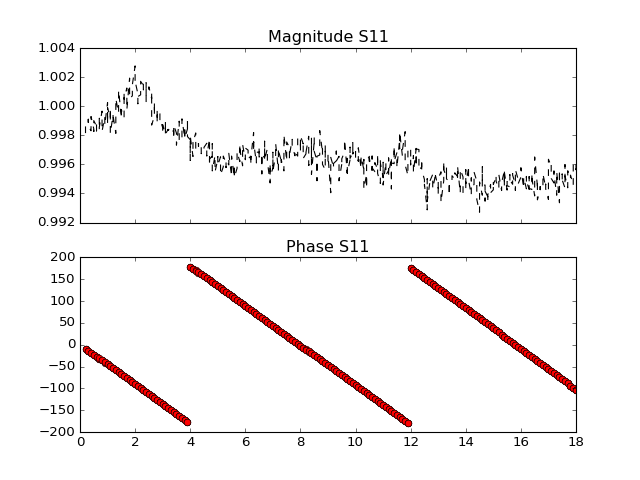

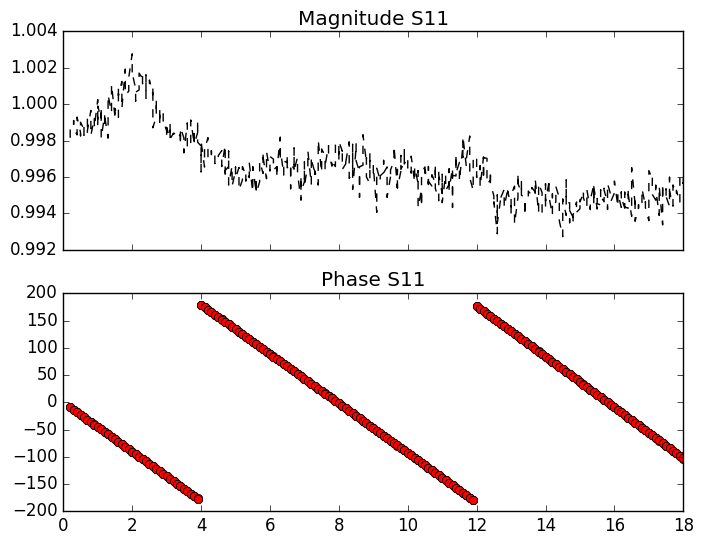

In [125]:
table.show()

In [134]:
table.column_names

['Frequency', 'Direction', 'Connect', 'magS11', 'argS11']

In [112]:
options={"Device_Id":table.metadata["Device_Id"],"System_Id":table.metadata["System_Id"]}
mean_frame=mean_from_history(history_dict[return_history_key(table)],column_names=table.column_names)

TwoPortRawModel


In [34]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


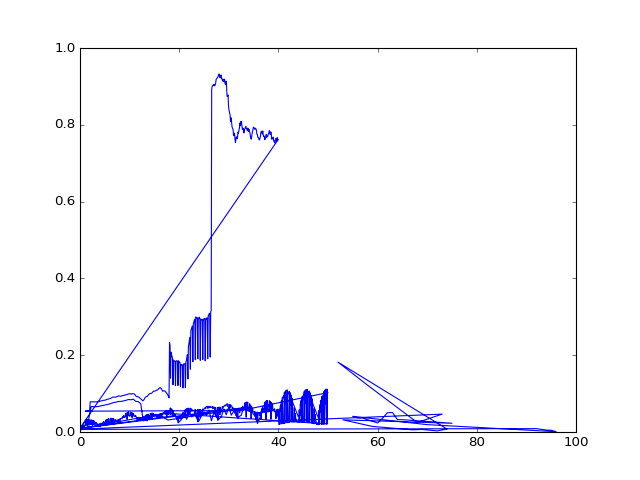

In [113]:
%matplotlib notebook
plt.plot(mean_frame["Frequency"],mean_frame["magS11"])

In [ ]:
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"])

In [25]:
one_port_history=history_dict[return_history_key(table)]

OnePortRawModel


In [135]:
options={"Device_Id":table.metadata["Device_Id"]}
mean_frame_2=mean_from_history(history_dict["1-port results"],
                               column_names=["Frequency","magS11","argS11"])

<IPython.core.display.Javascript object>


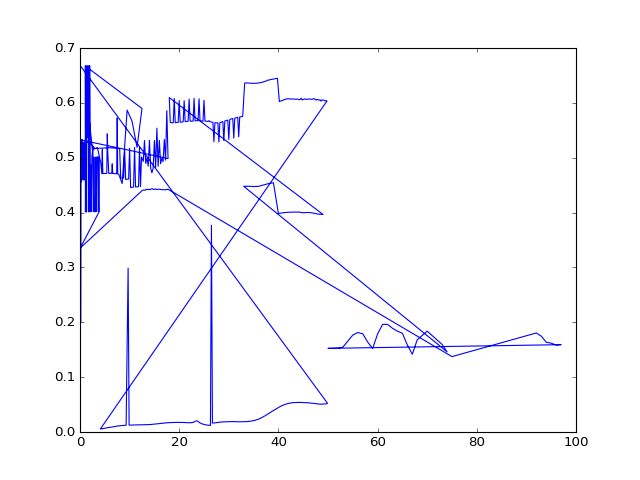

In [141]:
#mean_frame
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"])

In [82]:
history_dict["2-port results"].columns

Index([u'Device_Id', u'Frequency', u'Number_Measurements', u'magS11',
       u'argS11', u'magS21', u'argS21', u'magS22', u'argS22'],
      dtype='object')

In [30]:
out=one_port_history.rename(columns = {'mag':'magS11','arg':'argS11'})
out.to_csv(r"C:\Share\Converted_Check_Standard\Combined_One_Port_Check_Standard.csv",index=False)

In [29]:
out.columns

Index([u'Frequency', u'Direction', u'Connect', u'magS11', u'argS11',
       u'System_Id', u'System_Letter', u'Connector_Type_Calibration',
       u'Connector_Type_Measurement', u'Measurement_Type', u'Measurement_Date',
       u'Measurement_Time', u'Program_Used', u'Program_Revision', u'Operator',
       u'Calibration_Name', u'Calibration_Date', u'Port_Used',
       u'Number_Connects', u'Number_Repeats', u'Nbs', u'Number_Frequencies',
       u'Start_Frequency', u'Device_Description', u'Device_Id',
       u'Measurement_Timestamp'],
      dtype='object')

In [139]:
#diff=frequency_model_difference(table,mean_frame)
diff_2=frequency_model_difference(table,mean_frame_2)
diff_2.column_names=["Frequency","magS11","argS11"]

<IPython.core.display.Javascript object>


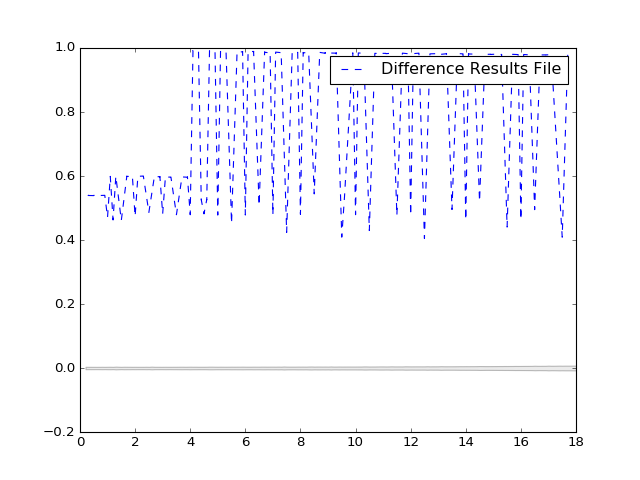

In [140]:

#plt.plot(diff["Frequency"],diff["magS11"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS11"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS11"]),calrep_table["uMgS11"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

In [138]:
print diff_2

Frequency,x1,x2
0.3,0.539245,-57.63434375
0.3,0.539565,-57.62934375
0.3,0.539115,-57.67234375
0.5,0.538923125,-61.157125
0.5,0.538743125,-61.183125
0.5,0.539493125,-61.173125
0.7,0.5395521875,-62.92665625
0.7,0.5387321875,-62.92665625
0.7,0.5389321875,-62.85665625
0.9,0.5396325,-64.9733125
0.9,0.5391125,-64.7863125
0.9,0.5390725,-64.8603125
1.0,0.472159534884,-71.2792790698
1.0,0.470679534884,-71.2582790698
1.0,0.471809534884,-71.2702790698
1.1,0.598132,-69.7184
1.1,0.598792,-69.9284
1.1,0.597072,-69.8704
1.2,0.4629975,-67.4757142857
1.2,0.4625475,-67.6087142857
1.2,0.4629375,-67.6357142857
1.3,0.597112,-76.129
1.3,0.597162,-76.093
1.3,0.599492,-76.095
1.5,0.461313809524,-70.9501428571
1.5,0.461173809524,-70.8801428571
1.5,0.461763809524,-71.0271428571
1.7,0.599974,-89.0096
1.7,0.599524,-88.8986
1.7,0.598474,-89.0496
1.9,0.59939,-93.5494
1.9,0.59982,-93.5584
1.9,0.60015,-93.5044
2.0,0.475008139535,-114.812162791
2.0,0.473868139535,-114.840162791
2.0,0.473958139535,-114.866162791
2.1,0.

<IPython.core.display.Javascript object>


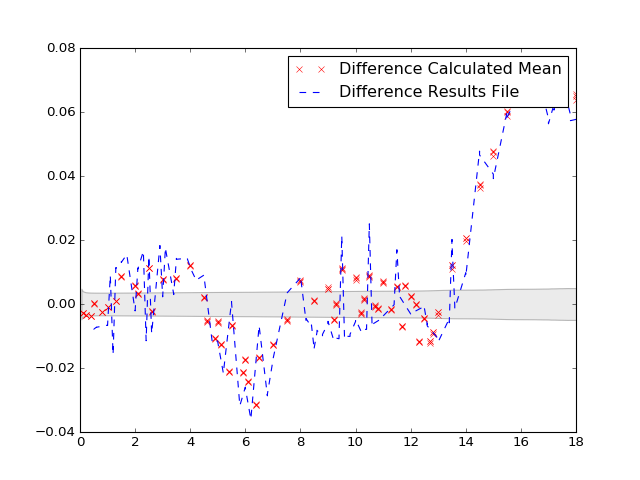

In [95]:
plt.plot(diff["Frequency"],diff["magS22"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS22"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS22"]),calrep_table["uMgS22"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

<IPython.core.display.Javascript object>


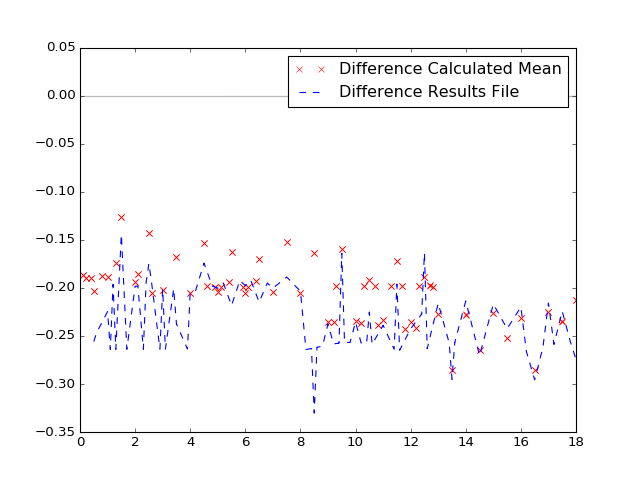

In [96]:
plt.plot(diff["Frequency"],diff["magS21"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS21"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS21"]),calrep_table["uMgS21"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

<IPython.core.display.Javascript object>


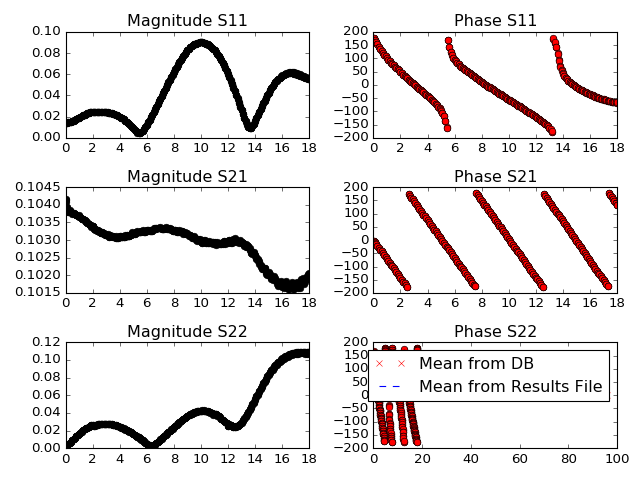

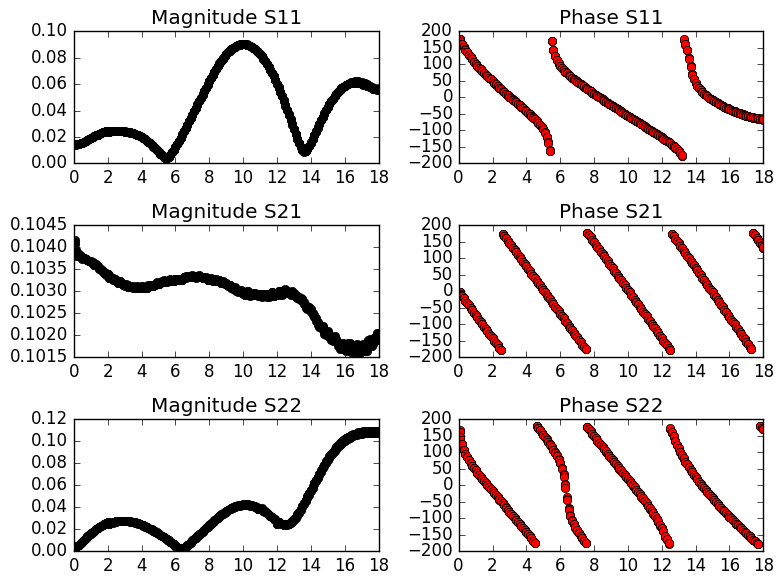

In [97]:
table.show()

<IPython.core.display.Javascript object>


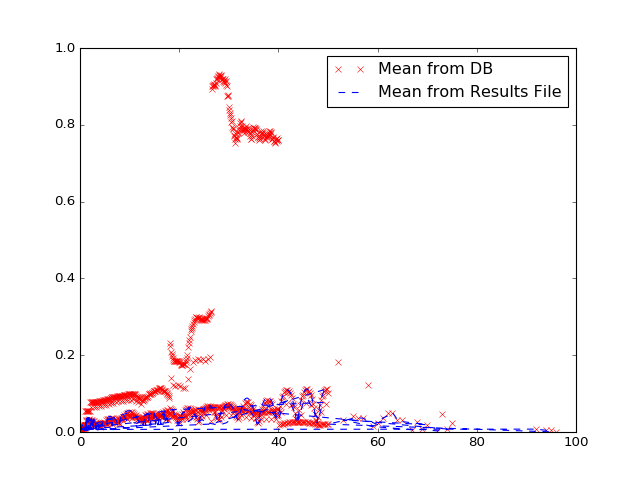

In [100]:
plt.plot(mean_frame["Frequency"],mean_frame["magS11"],"rx",label="Mean from DB")
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"],"b--",label="Mean from Results File")
plt.legend()

In [101]:
mean_frame_2

,Frequency,magS11,argS11,magS21,argS21,magS22,argS22
0,0.010,0.006818,-27.743950,0.377586,-0.953700,0.005963,12.436600
1,0.020,0.006508,-11.749421,0.359256,-1.696632,0.004999,14.668000
2,0.030,0.006583,29.711789,0.359229,-2.554789,0.005077,22.650000
3,0.040,0.006595,67.797632,0.359210,-3.376474,0.005077,23.504211
4,0.050,0.006606,50.133480,0.390416,-3.868720,0.006291,39.139960
5,0.060,0.006657,65.622895,0.359182,-5.015053,0.005091,41.125368
6,0.070,0.006710,67.691737,0.359166,-5.857000,0.005144,43.574000
7,0.080,0.006718,67.891421,0.359149,-6.689579,0.005104,44.641000
8,0.090,0.006752,66.480737,0.359124,-7.535368,0.005153,42.297474
9,0.100,0.007820,55.924241,0.344179,-7.347034,0.007230,36.957586
